This example is meant to illustrate situations where k-means will produce unintuitive and possibly unexpected clusters. In the first three plots, the input data does not conform to some implicit assumption that k-means makes and undesirable clusters are produced as a result. In the last plot, k-means returns intuitive clusters despite unevenly sized blobs.

In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


Import useful libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#### Data Import

In [3]:
# Read the file 'master_dataset.xlsx' into a DataFrame df using the read_xls() function.
df = pd.read_excel('feature_data_class.xlsx', sheetname='Sheet1')

In [4]:
# Select the features and call the new dataframe 'feature_df'
feature_df = df.iloc[:,2:91]
feature_df.head()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Jewelry,...,Computer_Software,Books,Musical_Instruments,Star_Wars,Movies_TV,Video_Games,Portable_Audios,Cameras_Camcoders,Auto_Electronics,Wearable_Tech
0,42.31,2.572,10382.9,6115.67,215.07,2406.62,6551.42,211.096358,8.106,20094.19,...,46866.41,73315.81,57022.45,118966.90,58034.24,56157.83,113009.41,27930.71,32954.82,10344.16
1,38.51,2.548,10382.9,6115.67,215.07,2406.62,6551.42,211.242170,8.106,57258.43,...,32893.64,77280.42,57845.36,126907.41,63245.00,66172.11,111466.37,5265.09,30149.20,14740.14
2,39.93,2.514,10382.9,6115.67,215.07,2406.62,6551.42,211.289143,8.106,16333.14,...,42866.79,78602.71,59462.22,122267.65,69962.56,62795.87,124821.44,5265.09,33726.13,10139.42
3,46.63,2.561,10382.9,6115.67,215.07,2406.62,6551.42,211.319643,8.106,41595.55,...,33593.80,76091.36,63011.44,135066.75,62581.64,72212.32,107952.07,28420.73,31585.78,12087.95
4,46.50,2.625,10382.9,6115.67,215.07,2406.62,6551.42,211.350143,8.106,19403.54,...,32299.49,71718.48,57335.17,125048.08,57630.02,55501.07,103652.58,28420.73,28457.31,10871.74


In [5]:
# convert df_sales to numpy array
# convert df['Type'] - the target to numpy array
feature_df.values

array([[  4.23100000e+01,   2.57200000e+00,   1.03829000e+04, ...,
          2.79307100e+04,   3.29548200e+04,   1.03441600e+04],
       [  3.85100000e+01,   2.54800000e+00,   1.03829000e+04, ...,
          5.26509000e+03,   3.01492000e+04,   1.47401400e+04],
       [  3.99300000e+01,   2.51400000e+00,   1.03829000e+04, ...,
          5.26509000e+03,   3.37261300e+04,   1.01394200e+04],
       ..., 
       [  7.93700000e+01,   3.61400000e+00,   3.78994000e+03, ...,
          2.94000000e+00,   6.46332000e+03,   1.06102000e+03],
       [  8.28400000e+01,   3.73700000e+00,   2.96149000e+03, ...,
          2.94000000e+00,   6.46332000e+03,   1.06102000e+03],
       [  7.60600000e+01,   3.80400000e+00,   2.12020000e+02, ...,
          2.94000000e+00,   6.46332000e+03,   1.06102000e+03]])

In [6]:
df['Typ_STAT'].values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [7]:
# Assign X and y to the features and target data respectively
X = feature_df.values
y = df['Typ_STAT'].values

#### Create Plots

In [8]:
plt.figure(figsize=(12, 12))

In [10]:
# Incorrect number of clusters
random_state = 170
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

In [11]:
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

In [17]:
# Anisotropicly distributed data
transformation = [[0.60834549]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

ValueError: shapes (8190,89) and (1,1) not aligned: 89 (dim 1) != 1 (dim 0)

In [11]:
ms.fit(X)

MeanShift(bandwidth=84268.265872391261, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [12]:
labels = ms.labels_

In [13]:
cluster_centers = ms.cluster_centers_

In [14]:
labels_unique = np.unique(labels)

In [15]:
n_clusters_ = len(labels_unique)

In [16]:
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 1


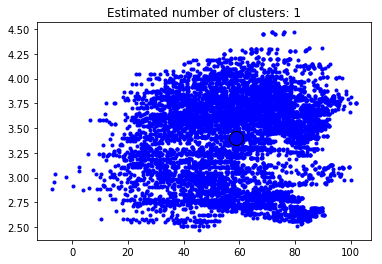

In [17]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()